In [1]:
# Run this cell first!
from client.api.notebook import Notebook
ok = Notebook('lab04.ok')

Assignment: lab04
OK, version v1.18.1



# Lab 4: Gradient method

This ungraded assignment is composed of **8 exercises** on differentiable optimization and gradient descent. In order to understand and solve the exercises, and more generally to gain the maximum benefit from this assignment, it is highly recommended that you read **Chapter 4** in the course notes available on [Blackboard](https://esiee.blackboard.com/).

<span style="color:#a50e3e;">**IMPORTANT: Please refer to Chapter 4 as you work through this assignment.**</span>

## Instructions

 - Download a copy of this notebook from [Blackboard](https://esiee.blackboard.com/).
 
 
 - Run `jupyter notebook` and open the `.ipynb` file.
   - *Keep the notebook inside the folder it was downloaded with.*


 - **Work alone or with a partner** to solve the quizzes. 
   - *You are supposed to fill in or modify the code marked with the comment `# YOUR CODE HERE`*
   - *You can check your answers by running the tests provided at the end of each quiz*

## Contents

| Exercise | Topic |
|----------|:------|
| [Quiz 1](#Quiz-1) | Differentiable functions | 
| [Quiz 2](#Quiz-2) | Automatic differentiation | 
| [Quiz 3](#Quiz-3) | Gradient descent | 
| [Quiz 4](#Quiz-4) | Convex function of one variable | 
| [Quiz 5](#Quiz-5) | Convex function of multiple variables | 
| [Quiz 6](#Quiz-6) | Nonconvex function of one variable | 
| [Quiz 7](#Quiz-7) | Nonconvex function of multiple variables | 
| [Quiz 8](#Quiz-8) | Elimination of a "simple" equality constraint |

## Required packages

For this assignment, you need to import the following packages.
- [**Numpy**](www.numpy.org) - The library for scientific computing in Python.
- [**Matplotlib**](http://matplotlib.org) - The library for plotting graphs in Python.
- [**Autograd**](https://github.com/HIPS/autograd) - The library for automatic differentiation of Numpy code.

**Installation:** Open the terminal (Anaconda prompt on Windows) and execute the following command:

```
pip install autograd
```

Depending on your installation, you may also need to execute the following command:

```
pip install scikit-learn
```

In [2]:
from autograd import grad
import autograd.numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

*Make sure to run the next cell. It gather the code for the fancy visualization.*

In [3]:
def plot_history_2d(history, cost_fun, xlim, ylim, zlim):
    a_values, b_values = np.meshgrid(np.linspace(*xlim), np.linspace(*ylim))
    J_values = [cost_fun([a,b]) for a,b in zip(a_values.flat, b_values.flat)]
    J_values = np.reshape(J_values, a_values.shape)
    levels = np.logspace(*zlim, 10)
    from matplotlib.colors import LogNorm
    fig = plt.figure(figsize=(14,5), facecolor='white')
    plt.subplot(121)
    plt.contour(a_values, b_values, J_values, levels=levels, norm=LogNorm(), alpha=.4, colors = 'k')
    plt.contourf(a_values, b_values, J_values, levels=levels, norm=LogNorm(), alpha=.4, cmap='jet')
    plt.plot(history[:,0], history[:,1], '-o', lw=2, mfc='w', ms=8, zorder=2)
    plt.title('Points generated by gradient descent')
    plt.subplot(122)
    plt.plot([cost_fun(w) for w in history], lw=2)
    plt.title('Convergence plot')
    plt.show()

def plot_history_1d(history, cost_fun, wmin, wmax):
    fig = plt.figure(figsize=(12,4), facecolor='white')
    plt.subplot(121)
    t = np.linspace(wmin,wmax)
    plt.plot(t, cost_fun(t), 'k')
    plt.plot(history, cost_fun(history), 'o', mfc='w', ms=8)
    plt.title('Points generated by gradient descent')
    plt.subplot(122)
    plt.plot([cost_fun(w) for w in history], lw=2)
    plt.title('Convergence plot')
    plt.show()

## Quiz 1

Differentiable functions play an important role in optimization, because their local behavior is described by the derivative (in $\mathbb{R}$) or the gradient (in $\mathbb{R}^N$). Remember that a function is said to be differentiable at a given point if the derivative/gradient exists there. Most functions that occur in practice have derivatives at all points or at almost every point. If a function is differentiable at a point, then it must also be continuous there. But the converse does not hold! Moreover, not all differentiable functions have continuous derivatives. Discontinuous derivatives may cause issues in the context of optimization. This is why there exist different levels of differentiability with stronger and stronger requirements.

- **Differentiable almost everywhere:** A function that is differentiable at all points except a subset of [measure zero](https://en.wikipedia.org/wiki/Almost_everywhere).

- **Differentiable (everywhere):** A function that is differentiable at every point of its domain. 

- **Continuously differentiable:** A differentiable function with a continuous derivative. 

- **Lipschitz differentiable:**  A function with a continuous derivative that is *globally* limited in how fast it can change.

- Lipschitz differentiable $\Rightarrow$ Continuously differentiable $\Rightarrow$ Differentiable $\Rightarrow$ Differentiable almost everywhere.

Please refer to Section 4.1 of the [course notes](https://persointra.esiee.fr/~chierchg/optimization/content/04/derivative.html) and the [lecture slides](https://esiee.blackboard.com) for more details.

---

> **1. Implement the following functions with Numpy operations** 
>
> $$ 
\begin{aligned}
f_1(w) &= \big(2w-\frac{1}{2}\big)^2 \\[0.5em]
f_2(w) &= \frac{1}{2}|w| + w^3 \\[0.5em]
f_3(w) &= \frac{w}{\sqrt{|w|}} \\[0.5em]
f_4(w) &= \frac{w^2}{1 + e^{\frac{1}{w}}} \\[0.5em]
f_5(w) &= \log(1+e^{10w}) \\[0.5em]
f_6(w) &= w^2 \sin\big(\frac{10}{w}\big).
\end{aligned}
$$
>
> **2. Determine the differentiability class of each function by looking at their derivatives.**

*Hints:*

In the cell below, each variable `f1`, `f2`, ..., `f6` is actually a function. The common way to define a function in Python is via the standard `def` declaration:
```python
def function(w):
    return ...
``` 
Alternatively, you can also create an inline function with the `lambda` keyword:
```python
function = lambda w: ...
```

<!--
# Derivative
g1 = lambda w: 8*w - 2  # SOLUTION
g2 = lambda w: np.sign(w)/2 + 3*w**2  # SOLUTION
g3 = lambda w: w**2 / (2 * np.abs(w)**(5/2))  # SOLUTION
g4 = lambda w: (2*w + 2*w * np.exp(1/w) + np.exp(1/w)) / (1 + np.exp(1/w))**2  # SOLUTION
g5 = lambda w: 10*np.exp(10*w) / (1 + np.exp(10*w))  # SOLUTION
g6 = lambda w: 2*w * np.sin(10/w) - 10*np.cos(10/w)  # SOLUTION
-->

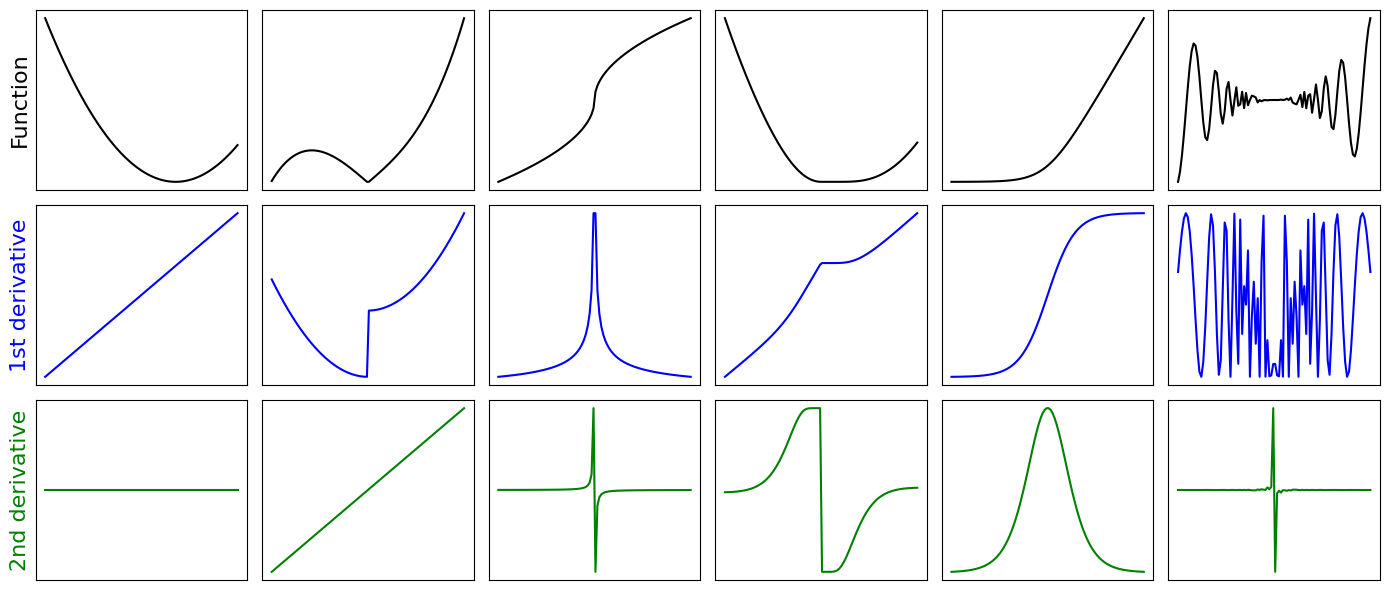

In [9]:
# Functions
f1 = lambda w: np.power((2*w-1/2), 2)
f2 = lambda w: (1/2*np.absolute(w) + np.power(w,3))
f3 = lambda w: (w/np.sqrt(np.absolute(w)))
f4 = lambda w: (np.power(w, 2)/(1+ np.exp(1/w)))
f5 = lambda w: (np.log(1+np.power(np.exp(1), 10*w)))
f6 = lambda w: np.power(w, 2)*np.sin(10/w)

# Visualization (nothing to do here)
t = np.linspace(-0.7, 0.7, 100)
plt.figure(figsize=(14, 6), tight_layout=True)
for i, fi in enumerate([f1, f2, f3, f4, f5, f6]):
    plt.subplot(3,6,i+1)
    if fi is not None: plt.plot(t, fi(t), 'k')
    plt.xticks([])
    plt.yticks([])
    if i==0: plt.ylabel('Function', fontsize=16)
    plt.subplot(3,6,6+i+1)
    if fi is not None: plt.plot(t, [grad(fi)(x) for x in t], 'b')
    plt.xticks([])
    plt.yticks([])
    if i==0: plt.ylabel("1st derivative", fontsize=16, color='b')
    plt.subplot(3,6,12+i+1)
    if fi is not None: plt.plot(t, [grad(grad(fi))(x) for x in t], 'g')
    plt.xticks([])
    plt.yticks([])
    if i==0: plt.ylabel("2nd derivative", fontsize=16, color='g')
plt.show()

In [10]:
ok.grade("differentiable");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 6
    Failed: 0
[ooooooooook] 100.0% passed



## Self-assessment

*Run the next cell and answer the questions.* Review the lecture notes and the previous exercises in case you overlooked important concepts.

In [11]:
from quiz import display_quiz
display_quiz("quiz/04_1.json")

<IPython.core.display.Javascript object>

## Quiz 2

Fortunately, there exist special calculators to automatically compute the derivative/gradient of arbitrary complicated mathematical functions, which free us from the burden of having to calculate it on paper. The `autograd` package provides an easy-to-use automatic differentiator written in Python. Autograd can automatically differentiate native Python and Numpy code. It handles a large subset of Python features, including loops, ifs, recursion, and closures. It can efficiently take gradients of scalar-valued functions with respect to array-valued arguments. Autograd comes with its own wrapper on the Numpy library. This is where the differentiation rules are defined. You can use the Autograd wrapped version of Numpy exactly like you would use the standard version. The line below is used to import it.

```python
import autograd.numpy as np
```

Autograd provides the function `grad()` to perform the automatic differentiation. It takes in a "Python function" that implements a "mathematical function", and returns another "Python function" that computes its derivative. This covers the common case of gradients used for optimization. The line below is used to import it.

```python
from autograd import grad
```

Please refer to Section 4.2 of the [course notes](https://persointra.esiee.fr/~chierchg/optimization/content/04/autograd.html) and the [lecture slides](https://esiee.blackboard.com) for more details.

---

> **1. Implement the following functions with Numpy operations**
>
> $$ 
\begin{aligned}
(\forall w\in \mathbb{R})\qquad f_1(w) &= \log(1+e^{10w}) \\[0.5em]
(\forall {\bf w}=[w_0,w_1]^\top\in \mathbb{R}^{2})\qquad f_2({\bf w}) &= w_0 - 2 w_1 \\[0.5em]
(\forall {\bf w}=[w_0,w_1]^\top\in \mathbb{R}^{2})\qquad f_3({\bf w}) &= (w_0-w_1^2)^2.
\end{aligned}
$$
>
> **2. Analytically calculate the derivative/gradient of each function, and implement them with Numpy operations.**
>
>
> **3. Use Autograd to automatically compute the derivative/gradient of each function, and check that is equal to your calculations.**


*Hints:*

To automatically compute a gradient, you should first define a function that **takes in a single array** and **returns a scalar**. For this, you could use either the standard `def` declaration
```python
def cost(w):
    return ...
``` 
or the `lambda` keyword
```python
cost = lambda w: ...
```

Then, you let Autograd generate the Python function that computes the gradient 
```python
gradient = grad(cost)
```

Now, you can use the variable returned by `grad()` as any other Python function. In particular, it **takes in an array** and **returns an array** of the same size. The returned array is the gradient evaluated at the input array.
```python
w = np.array([...], dtype=float)  # array of 'float' elements (important!)
g = gradient(w)                   # 'g.shape' is equal to 'w.shape'
```

To recap, the Autograd function `grad()` takes one input and return one output.
 - **Input:** The "Python function" that implements a "mathematical function". 
 - **Output:** The "Python function" that implements the gradient of the "mathematical function" passed as input.

Remember that the name of a function is a variable in Python !

In [20]:
# Functions
fun1 = lambda w: np.log(1 + np.power(np.exp(1), 10*w))
fun2 = lambda w: w[0] - 2*w[1]
fun3 = lambda w: np.power(w[0] - np.power(w[1], 2), 2)


w = np.array([1.,5.])

# Analytical gradient: calculate it by yourself and implement it
g1_formula = 10 * np.exp(10 * w) / (1 + np.exp(10 * w))
g2_formula = None
g3_formula = None

# Automatic gradient: use the 'grad' function imported from the Autograd package

g1_auto = grad(fun1(w))
g2_auto = grad(fun2(w))
g3_auto = grad(fun3(w))

# Debugging tips: 
#  - define a float array 'w' of appropriate length
#  - print 'gi_formula(w)' and 'gi_auto(w)'
#  - the two results must be equal up to 7 digits

In [21]:
ok.grade("autograd");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
autograd > Suite 1 > Case 2

>>> [np.abs(g1_formula(x) - g1_auto(x)) < 1e-7 for x in [-1., 0., 1.]]
TypeError: 'numpy.ndarray' object is not callable

# Error: expected
#     [True, True, True]
# but got
#     Traceback (most recent call last):
#       ...
#     TypeError: 'numpy.ndarray' object is not callable

Run only this test case with "python3 ok -q autograd --suite 1 --case 2"
---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 1
[oooook.....] 50.0% passed



## Quiz 3

Gradient descent is an algorithm for finding a local minimum of a differentiable function. It is a local optimization algorithm that starts from an initial point and refines it over and over by incremental steps. Specifically, each step updates the current point by traveling in the opposite direction of the gradient (evaluated at the current point), because this is the direction of steepest descent for a function. 

The algorithm is equipped with two important parameters:
 - **Step-size.** Small coefficent that is multiplied to the gradient for limiting the length travelled at each step.
 - **Epochs.** Number of steps to execute before the solution is returned by the algorithm.

The choice of these parameters is of paramount importance. **The algorithm converges to the correct solution only if these parameters are selected properly!!!**

<!--
The basic intuition behind gradient descent can be illustrated by a hypothetical scenario. A person is stuck in the mountains and is trying to get down. There is heavy fog such that visibility is extremely low. Since the path down the mountain is not visible, they are forced to resort only to clues in their proximity to find the way down. They can use the method of gradient descent, which involves looking at the steepness of the hill at their current position, then proceeding downhill in the direction with the steepest descent. Using this method, they would eventually find their way down the mountain or possibly get stuck in some plateau, like a mountain lake. However, assume also that the steepness of the hill is not immediately obvious with simple observation, but rather it requires a sophisticated instrument to measure, which the person happens to have at the moment. It takes quite some time to measure the steepness of the hill with the instrument, thus they should minimize their use of the instrument if they wanted to get down the mountain before sunset. The difficulty then is choosing the frequency at which they should measure the steepness of the hill so not to go off track. In this analogy, the person represents the algorithm, and the path taken down the mountain represents the sequence of points that the algorithm will explore. The steepness of the hill represents the slope of a cost function at that point. The instrument used to measure steepness is differentiation. The direction they choose to follow is the gradient at that point. The distance they travel before taking another measurement is the step-size. 
-->

Please refer to Section 4.4 of the [course notes](https://persointra.esiee.fr/~chierchg/optimization/content/04/gradient_descent.html) and the [lecture slides](https://esiee.blackboard.com) for more details.

---

> 
> **Complete the implementation of gradient descent. You must write the code that updates the current point according to the following operation** 
>
> $$ {\bf w} \leftarrow {\bf w} - \alpha\nabla J({\bf w}). $$

*Hints:* The variable `gradient` is actually the python function that computes the gradient $\nabla J({\bf w})$.

In [22]:
def gradient_descent(cost_fun: callable, init: np.ndarray, alpha: float, epochs: int):
    """Find the point that minimizes the cost function.
    
    INPUTS:
    cost_fun -- Function that takes an input array and returns a scalar value.
    init     -- Initial point
    alpha    -- Step-size 
    epochs   -- Number of iterations
    
    OUTPUTS:
    w       -- Final point computed by the algorithm
    history -- List of points [w0, w1, ..., wn] generated by the algorithm
    """
    
    # automatic gradient
    from autograd import grad
    gradient = grad(cost_fun)
    
    # initialization
    w = np.array(init, dtype=float)
    
    # gradient descent
    history = [w]   
    for k in range(epochs):
        
        # compute the next point
        w = w - alpha*gradient(w)

        # track the history
        history.append(w.copy())
        
    return w.squeeze(), np.stack(history)

In [23]:
ok.grade("gradient_descent");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## Quiz 4

Congratulations: you implemented the algorithm of gradient descent ! Now is the time to test it on a concrete optimization problem. You will work on the example described in Section 4.6.1 of the [course notes](https://persointra.esiee.fr/~chierchg/optimization/content/04/example1.html) and the [lecture slides](https://esiee.blackboard.com), which consists of finding the minimum of a **convex function of one variable**.

---

> **1. Implement the following cost function with NumPy operations supported by autograd**
>
> $$ (\forall w\in\mathbb{R})\qquad J(w) = \frac{1}{50}\Big( w^4 + w^2 + 10w\Big). $$

> **2. Solve the equation $J'(\bar{w}) = 0$ in analytic form, and implement the resulting expression in Python/Numpy.**

> **3. Find the minimum with gradient descent, and check that the numerical error w.r.t. the exact solution $\bar{w}$ is less than $10^{-5}$.**

*Hints:* 
 - You may find useful the functions [`np.sqrt()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sqrt.html) and [`np.cbrt()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cbrt.html)
 - Evaluate the error through the absolute difference $|w - \bar{w}|$
 - To reduce the numerical error, play with the parameters `alpha` (step-size) and `epochs` (number of iterations) of gradient descent.
 - Look at the sequence of points generated by gradient descent, and make sure they converge to the mimumum.

$1/50 \big(4w^3 + 2w + 10\big) = 0 => 4w^3 + 2w = -10 => 2w^3 + w = -250$

In [59]:
# Answer 1. Cost function
cost_fun = 1/50 * (np.power(w,4) + np.power(w,2) + 10*w)


# Answer 2. Analytical solution
w_bar = 2*np.power(w, 3) + w +250


# Answer 3a. Initialization
#
# HINT: Create the vector expected by 'cost_fun'. What should be the size of this vector?
#
init = None # YOUR CODE HERE


# Answer 3b. Optimization
#
#     w, history = gradient_descent(...)
#
... # YOUR CODE HERE


# Answer 3c. Numerical error
error = None # YOUR CODE HERE


print('  Exact solution:', w_bar)
print('Gradient descent:', w)
print(' Numerical error: {:.0e}'.format(error))

plot_history_1d(history, cost_fun, wmin=-3, wmax=3)

In [ ]:
ok.grade("convex_one");

## Self-assessment

*Run the next cell and answer the questions.* Review the lecture notes and the previous exercises in case you overlooked important concepts.

In [68]:
from quiz import display_quiz
display_quiz("quiz/04_2.json")

## Quiz 5

One-dimensional functions are useful to gain insight on the inner working of gradient descent, but the real difficulty in optimization is to deal with multi-dimensional functions. Incidentally, this is where gradient descent works best (if the function is differentiable). You will now work on the example described in Section 4.6.2 of the [course notes](https://persointra.esiee.fr/~chierchg/optimization/content/04/example2.html) and the [lecture slides](https://esiee.blackboard.com), which consists of finding the minimum of a **convex function of multiple variables**.

---

> **1. Implement the following cost function with NumPy operations supported by autograd:**
>
> $$ \big(\forall {\bf w}\in\mathbb{R}^N\big)\qquad J({\bf w}) = \frac{1}{2}\|A{\bf w}-{\bf b}\|^2 $$
>
> **where the matrix $A \in \mathbb{R}^{P\times N}$ and the vector ${\bf b} \in \mathbb{R}^{P}$ are given with $N=2$ and $P=3$.**

> **2. Solve the system $\nabla J({\bf\bar{w}}) = {\bf0}$ in analytic form, and implement the resulting expression in Python/Numpy using**
>
> $$ A=\begin{bmatrix} 1 & 2 \\ 3 & 2 \\ 1 & 1 \end{bmatrix} \qquad {\bf b} = \begin{bmatrix}1 \\ -2 \\ -1 \end{bmatrix}. $$

> **3. Find the minimum with gradient descent, and check that the numerical error w.r.t. the exact solution $\bar{\bf w}$ is less than $10^{-5}$.**

*Hints:* 
- Recall the basic operations of linear algebra in NumPy:
  - The operator [`@`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html#numpy.matmul) performs a matrix multiplation;
  - The function [`np.linalg.inv`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html) performs a matrix inversion;
  - The attribute [`.T`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.T.html) performs a matrix transpose.
  - The function [`np.linalg.norm`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html) computes the norm $\|\cdot\|$ of a vector/matrix.
  -


 - Evaluate the error through the Euclidean distance $\|{\bf w} - {\bf\bar{w}}\|$.
 - To reduce the numerical error, play with the parameters `alpha` (step-size) and `epochs` (number of iterations) of gradient descent.
 - Look at the sequence of points generated by gradient descent, and make sure they converge to the mimumum.

In [69]:
# Answer 1. Cost function
def quadratic_function(w, A, b):
    w = np.array(w)
    J = None # YOUR CODE HERE
    return J 

# This is the actual cost function, where the arguments 'A' and 'b' are now fixed
cost_fun = lambda w: quadratic_function(w, A, b)


# Answer 2. Analytical solution
A = np.array([[1.,2],[3,2],[1,1]])
b = np.array([1.,-2, -1])
w_bar = None # YOUR CODE HERE


# Answer 3a. Initialization
#
# HINT: Create the vector expected by 'cost_fun'. What should be the size of this vector?
#
init = None # YOUR CODE HERE


# Answer 3b. Optimization
#
#     w, history = gradient_descent(...)
#
... # YOUR CODE HERE


# Answer 3c. Numerical error
error = None # YOUR CODE HERE


print('  Exact solution:', w_bar)
print('Gradient descent:', w)
print(' Numerical error: {:.0e}'.format(error))

plot_history_2d(history, cost_fun, xlim=[-2,0], ylim=[0,2], zlim=[-1,1.5])

In [ ]:
ok.grade("convex_multi");

## Quiz 6

From an optimization standpoint, convex functions have a desirable property: all stationary points are global minima. Gradient descent is thereby guaranteed to always find a global minimum, provided that it converged. This is however not true with nonconvex functions, and thus gradient descent may converge to a stationary point that is not a global minimum, and sometimes not even a local minimum. If there are multiple stationary points, the one that is found by gradient descent depends on both the initialization and the step-size. You will now work on the example described in Section 4.6.3 of the [course notes](https://persointra.esiee.fr/~chierchg/optimization/content/04/example3.html) and the [lecture slides](https://esiee.blackboard.com), which consists of finding the minimum of a **nonconvex function of one variable**.

---

> **1. Implement the following cost function with NumPy operations supported by autograd:**
>
> $$ (\forall w\in\mathbb{R})\qquad J(w) = \cos(2w+1) + 0.2 w^2. $$

> **2. Find the global minimum with gradient descent. Check that the numerical error w.r.t. the solution $\bar{w}\approx0.972883$ is small.**

> *Hints:* 
>  - You may find useful the function [`np.cos()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cos.html)
>  - You should try out different initializations, until gradient descent converges to the global minimum.
>  - Evaluate the error through the absolute difference $|w - \bar{w}|$
>  - To reduce the numerical error, play with the parameters `alpha` (step-size) and `epochs` (number of iterations) of gradient descent.
>  - Look at the sequence of points generated by gradient descent, and make sure they converge to the mimumum.

In [72]:
# Answer 1. Cost function
cost_fun = None # YOUR CODE HERE


# Answer 2a. Initialization
#
# HINT: Create the vector expected by 'cost_fun'. What should be the size of this vector?
#
init = None # YOUR CODE HERE


# Answer 2b. Optimization
#
#     w, history = gradient_descent(...)
#
... # YOUR CODE HERE


# Answer 2c. Numerical error
w_bar = 0.972883
error = None # YOUR CODE HERE


print('  Exact solution:', w_bar)
print('Gradient descent:', w)
print(' Numerical error: {:.0e}'.format(error))

plot_history_1d(history, cost_fun, wmin=-3, wmax=2.5)

In [ ]:
ok.grade("nonconvex_one");

## Quiz 7

The most difficult optimization problems are those involving multidimensional nonconvex functions, because they have many global and local minima, as well as saddle points. TThe best way to handle nonconvexity is to run the gradient descent algorithm repeatedly, each time with a different initialization, and check the values attained on the function being minimized. The solution corresponding to the lowest function value is probably the global minimum, or at least a better local minimum than the others. You will now work on the example described in Section 4.6.4 of the [course notes](https://persointra.esiee.fr/~chierchg/optimization/content/04/example4.html) and the [lecture slides](https://esiee.blackboard.com), which consists of finding the minimum of a **nonconvex function of multiple variables**.

---

> **1. Implement the following cost function with NumPy operations supported by autograd:**
>
> $$ \big(\forall (\mathbf{c}_1, \dots, \mathbf{c}_K)\in(\mathbb{R}^N)^K\big)\qquad J(\mathbf{c}_1, \dots, \mathbf{c}_K) = \sum_{p=1}^P\left( \min_{k\in\{1,\dots,K\}}\; \left\Vert \mathbf{x}_p - \mathbf{c}_k \right\Vert^2 \right), $$
>
> **where the vectors ${\bf x}_1,\dots, {\bf x}_P$ are given.**

*Hint:* The difficult part is to compute the pairwise square distances between the points ${\bf x}_1,\dots, {\bf x}_P$ and the centers ${\bf c}_1,\dots, {\bf c}_K$.

$$ X = 
\begin{bmatrix}
{\bf x}_1^\top \\
{\bf x}_2^\top \\
\vdots  \\
{\bf x}_P^\top \\
\end{bmatrix}
\qquad\qquad
C = 
\begin{bmatrix}
{\bf c}_1^\top \\
\vdots  \\
{\bf c}_K^\top \\
\end{bmatrix}
\qquad\qquad
\operatorname{dist}^2(X,C) = 
\begin{bmatrix}
\|{\bf x}_1 - {\bf c}_1\|^2 & \|{\bf x}_1 - {\bf c}_2\|^2 & \dots & \|{\bf x}_1 - {\bf c}_K\|^2 \\
\|{\bf x}_2 - {\bf c}_1\|^2 & \|{\bf x}_2 - {\bf c}_2\|^2 & \dots & \|{\bf x}_2 - {\bf c}_K\|^2 \\
\vdots & \vdots & \ddots & \vdots \\
\|{\bf x}_P - {\bf c}_1\|^2 & \|{\bf x}_P - {\bf c}_2\|^2 & \dots & \|{\bf x}_P - {\bf c}_K\|^2 \\
\end{bmatrix}
$$

It is possible to compute the pairwise differences via broadcasting. Here is how to do so.
 - Reshape the matrix `points` to size `(P, 1, N)`.
 - Reshape the matrix `centers` to size `(1, K, N)`.
 - The reshaped arrays now align for broadcasting (see below).

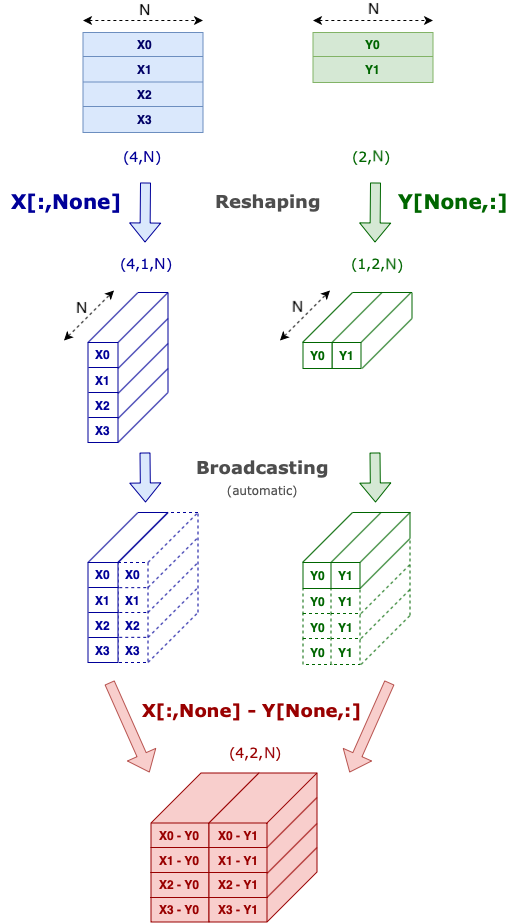

In [75]:
def kmeans_cost(centers, points):
    """
    centers -- matrix of shape (K, N)
    points  -- matrix of shape (P, N)
    """
    
    # Compute the squared distances ||x_p - c_k||^2 for all p and k. Stock them in a matrix of shape (P, K)
    #
    # ATTENTION: The distances must be squared!
    #
    square_dist = None # YOUR CODE HERE
        
    # Compute the minimum 'min_k ||x_p - c_k||^2'. Perform the operation along the right axis!
    mins = None # YOUR CODE HERE
    
    # Sum everything to get the cost 
    cost = None # YOUR CODE HERE
    
    return cost

In [ ]:
ok.grade("kmeans_cost");

> **2. Find the global minimum of $J(\mathbf{c}_1, \dots, \mathbf{c}_K)$ with gradient descent.**

*Hints:* 
 - The initial point `c_init` must be a matrix of shape $K\times N$, because this is the input expected by the function `kmeans_cost` implemented earlier. 
 - Each row of `c_init` is a cluster center (centroid). It is essential that you initialize them randomly!!!
 - What happens if you change the value assigned to $K$ (number of clusters)?

In [79]:
# Data points
points, y = datasets.make_blobs(n_samples=30, random_state=42)


# Step 1. Cost function
#
# HINT: It is 'kmean_cost', but you must pass it the 'points' defined above.
#
cost_fun = None # YOUR CODE HERE


# Step 2. Initialization
#
# HINT: Create the matrix expected by 'kmeans_cost'. What should be the size of this matrix?
#
np.random.seed(0)
N = points.shape[1]
K = 3
c_init = None # YOUR CODE HERE


# Step 3. Optimization
#
#     c, history = gradient_descent(...)
#
... # YOUR CODE HERE


# Visualization
plt.figure(figsize=(7,5))
plt.scatter(points[:,0], points[:,1], s=50, color='lightgray', edgecolor='k', label='Points')
plt.scatter(c[:,0], c[:,1], color='r', s=500, edgecolor='k', linewidth=2, marker=(5,1), label='Centers')
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=14)
plt.show()

In [ ]:
ok.grade("kmeans_optimization");

## Quiz 8

An optimization problem may sometimes require that the solution satisfies a specific condition. This scenario is commonly recognized as *constrained optimization*. Let's illustrate the concept on a concrete example.

> **Find the height $h$ and the radius $r$ of a closed cylinder having a volume of $V=33$ cm3 and the minimum surface area.**

Mathematically, this problem can be formulated as follows (note that $\mathbb{R}_{+} = [0,+\infty[\;$ and $\;\mathbb{R}_{++} = \left]0,+\infty\right[$)

$$
\operatorname*{minimize}_{(h,r)\in\mathbb{R}_+^2}\quad 2\pi (r^2 + rh) \quad\textrm{subject to}\quad \pi r^2 h = V.
$$

There is a little trick to deal with "simple" equality constraints such as the one above. You can rewrite the equation so that one variable is expressed in terms of the others:

$$ 
\pi r^2 h = V
\qquad\implies\qquad
h = \dfrac{V}{\pi r^2}.
$$

Now, you can substitute the variable $h$ in the cost function:

$$
2\pi (r^2 + rh) = 2\pi \left(r^2 + r \frac{V}{\pi r^2}\right) = 2\pi r^2 + \frac{2V}{r}.
$$

This leads to an equivalent optimization problem that involves only the variable $r$ and a positivity constraint ($r>0$):

$$
\operatorname*{minimize}_{r\in\mathbb{R}_{++}}\quad 2\pi r^2 + \frac{2V}{r}.
$$

You will now work on the example described in Section 4.6.5 of the [course notes](https://persointra.esiee.fr/~chierchg/optimization/content/04/example5.html) and the [lecture slides](https://esiee.blackboard.com), which consists of finding the minimum of a **function subject to an equality constraint**.

---

> **1. Implement the following function with NumPy operations supported by autograd:**
>
> $$ (\forall r\in\mathbb{R}_{++})\qquad J(r) = 2\pi r^2 + \frac{2V}{r} $$
>
> **where $V=33$.**

> **2. Solve the equation $J'(\bar{r}) = 0$ in analytic form, and implement the resulting expression in Python/Numpy.**

> **3. Find the minimum with gradient descent. Check that the numerical error w.r.t. the exact solution $\bar{r}$ is less than $10^{-5}$.**

> **4. Find the optimal $h$ by solving the equation $\pi \bar{r}^2 h = V$, where $\bar{r}$ is the solution computed above and $V=33$.**

> *Hints:* 
>  - You may find useful the constant `np.pi`
>  - Evaluate the error through the absolute difference $|r - \bar{r}|$
>  - To reduce the numerical error, play with the parameters `alpha` (step-size) and `epochs` (number of iterations) of gradient descent.
>  - Look at the sequence of points generated by gradient descent, and make sure they converge to the mimumum.

<!--
The first step is to identify the variables of the problem, which are the height $h$ and the radius $r$ of the cylinder. The next step is to write an equation for the quantity to optimize, that is the surface area of the cylinder:

$$
\begin{aligned}
J(h, r) &= A_{\rm top} + A_{\rm body} + A_{\rm bottom} \\
&= \pi r^2 + 2\pi r h + \pi r^2 \\
&= 2\pi (r^2 + rh).
\end{aligned}
$$

The final step is to check if the problem imposes any constraint on the solution. The answer is positive for the above example, as the volume of the cylinder must be $V=33$ cm3:

$$ V  = \pi r^2 h. $$

Mathematically, the problem can be modeled as 

$$
\operatorname*{minimize}_{(h,r)\in\mathbb{R}^2}\quad 2\pi (r^2 + rh) \quad\textrm{\rm subject to}\quad 
\begin{cases}
\pi r^2 h = V\\[0.5em]
r\ge0,
h\ge0.
\end{cases}
$$
-->

In [83]:
# Answer 1. Cost function
volume = 33
cost_fun = None # YOUR CODE HERE


# Answer 2. Analytical solution
radius_bar = None # YOUR CODE HERE


# Answer 3a. Initialization
#
# HINT: Create the vector expected by 'cost_fun'. What should be the size of this vector?
#
init = None # YOUR CODE HERE


# Answer 3b. Optimization
#
#     radius, history = gradient_descent(...)
#
... # YOUR CODE HERE


# Answer 3c. Numerical error
error = None # YOUR CODE HERE


# Answer 4. Solve for the other variable
height = None # YOUR CODE HERE


print('  Exact solution:', radius_bar)
print('Gradient descent:', radius)
print(' Numerical error: {:.0e}'.format(error))

plot_history_1d(history, cost_fun, wmin=1.1, wmax=2.5)

In [ ]:
ok.grade("cylinder");

## Self-assessment

*Run the next cell and answer the questions.* Review the lecture notes and the previous exercises in case you overlooked important concepts.

In [100]:
from quiz import display_quiz
display_quiz("quiz/04_3.json")